# Import

In [1]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [2]:


%matplotlib inline
from IPython.display import display
import matplotlib_inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import os

# Libreria per importare CSV da Drive
# from google.colab import drive

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", None)
pd.set_option('display.precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

# Functions

In [3]:
def ohe(df, list_of_columns):
    # Inizializzare OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
    # Manteniamo una copia del DataFrame originale
    df_encoded = df.copy()

    # Iterare sulle colonne da codificare
    for col in list_of_columns:
        # Applicare OneHotEncoder alla colonna specifica
        encoded = encoder.fit_transform(df[[col]])

        # Creare un DataFrame con le nuove colonne codificate, usando gli stessi indici del DataFrame originale
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]), index=df.index)

        # Concatenare le nuove colonne codificate al DataFrame originale
        df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
    df_encoded = df_encoded.drop(list_of_columns, axis=1)

    # Restituire il DataFrame finale, mantenendo le colonne originali
    return df_encoded

In [46]:
def train_and_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuratezza: {accuracy}')

    # Calcolare la precisione
    precision = precision_score(y_test, y_pred)
    print(f'Precisione: {precision}')

    # Calcolare il recall (sensibilità)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')

    # Calcolare FPR (False Positive Ration)
    print(f'FPR: {1 - recall}')

    # Matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    print(f'Matrice di confusione:\n{cm}')
    return model

In [5]:
def test(model, X_test, y_test):

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuratezza: {accuracy}')

    # Calcolare la precisione
    precision = precision_score(y_test, y_pred)
    print(f'Precisione: {precision}')

    # Calcolare il recall (sensibilità)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')

    # Calcolare FPR (False Positive Ration)
    print(f'FPR: {1 - recall}')

    # Matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    print(f'Matrice di confusione:\n{cm}')
    return 0

# Lettura Dataset

In [6]:
df = pd.read_csv("Base.csv")

# OneHotEncoder

In [7]:
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

In [8]:
feature_cols = ['income', 'name_email_similarity',
'prev_address_months_count', 'current_address_months_count',
'customer_age', 'days_since_request', 'intended_balcon_amount',
'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
'credit_risk_score', 'email_is_free', 'phone_home_valid',
'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
'month', 'employment_status_CA', 'employment_status_CB',
'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
'employment_status_CF', 'employment_status_CG', 'payment_type_AA',
'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
'payment_type_AE', 'housing_status_BA', 'housing_status_BB',
'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
'housing_status_BF', 'housing_status_BG', 'source_INTERNET',
'source_TELEAPP', 'device_os_linux', 'device_os_macintosh',
'device_os_other', 'device_os_windows', 'device_os_x11']

X = df[feature_cols] # Features
y = df['fraud_bool'] # Target variable

# Split train e test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train e test senza trasformazioni

In [11]:
model = RandomForestClassifier()
model = train_and_test(model, X_train, y_train)

Accuratezza: 0.989048
Precisione: 0.5
Recall: 0.002556610664718773
FPR: 0.9974433893352812
Matrice di confusione:
[[247255      7]
 [  2731      7]]


# Test sulle varianti

In [19]:
df_var1 = pd.read_csv("Variant I.csv")
df_var1 = ohe(df_var1,['employment_status','payment_type','housing_status', 'source', 'device_os'])

feature_cols = ['income', 'name_email_similarity',
'prev_address_months_count', 'current_address_months_count',
'customer_age', 'days_since_request', 'intended_balcon_amount',
'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
'credit_risk_score', 'email_is_free', 'phone_home_valid',
'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
'month', 'employment_status_CA', 'employment_status_CB',
'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
'employment_status_CF', 'employment_status_CG', 'payment_type_AA',
'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
'payment_type_AE', 'housing_status_BA', 'housing_status_BB',
'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
'housing_status_BF', 'housing_status_BG', 'source_INTERNET',
'source_TELEAPP', 'device_os_linux', 'device_os_macintosh',
'device_os_other', 'device_os_windows', 'device_os_x11']

X = df_var1[feature_cols] # Features
y = df_var1['fraud_bool'] # Target variable

test(model, X, y)

Accuratezza: 0.990593
Precisione: 0.998769987699877
Recall: 0.14724816393145343
FPR: 0.8527518360685465
Matrice di confusione:
[[988969      2]
 [  9405   1624]]


0

# Plot distribution

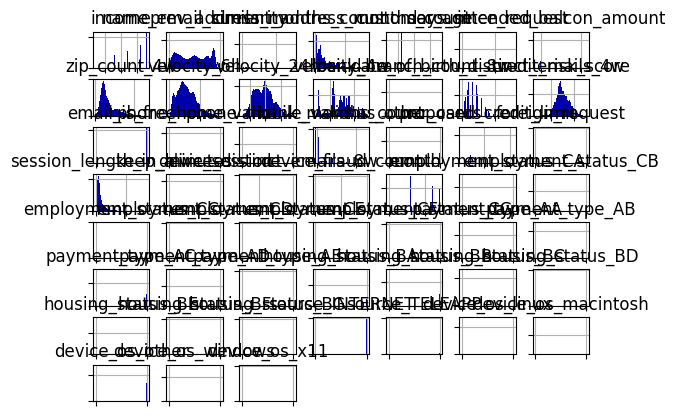

In [20]:
from pandas import read_csv
from matplotlib import pyplot

# drop the target variable
df = df.drop(['fraud_bool'], axis=1)

# create a histogram plot of each numeric variable
ax = df.hist(bins=100)

# disable axis labels to avoid the clutter
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
# show the plot
pyplot.show()

# Train e test con rapporto frodi non frodi 1 a 50

In [18]:
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*50)

df_rapp = pd.concat([df_frodi, df_not_frodi])


X = df_rapp[feature_cols] # Features
y = df_rapp['fraud_bool'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = RandomForestClassifier()
model = train_and_test(model, X, y)


KeyboardInterrupt: 

In [ ]:
X = df_var1[feature_cols] # Features
y = df_var1['fraud_bool'] # Target variable

test(model, X, y)

# Test e train con nan

In [ ]:
df = pd.read_csv("Base.csv"


df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*50)

df_rapp = pd.concat([df_frodi, df_not_frodi])

columns_with_minus_one = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes']
print(columns_with_minus_one)


# Count columns with specific value
def count_col(df,column_names,val):
    if isinstance(column_names, str):
        # If a single column name is provided, convert it to a list
        column_names = [column_names]
    for column_name in column_names:
        selected_rows = df[df[column_name] == val]
        print(column_name, ': ',selected_rows.shape[0])

# Replace specific value
def replace_col(df,column_names,initial,final):
    # Replace the specific value with another value
    replacement_value = final
    if isinstance(column_names, str):
        # If a single column name is provided, convert it to a list
        column_names = [column_names]
    for column_name in column_names:
        df.loc[df[column_name] == initial, column_name] = replacement_value

    return df

count_col(df_rapp,columns_with_minus_one,-1)
df_con_nan = replace_col(df_rapp,columns_with_minus_one,-1,np.nan)


['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes']
prev_address_months_count :  389151
current_address_months_count :  2354
bank_months_count :  141588
session_length_in_minutes :  1019


In [24]:

X = df_var1[feature_cols] # Features
y = df_var1['fraud_bool'] # Target variable

test(model, X, y)

Accuratezza: 0.673239
Precisione: 0.013968338023312377
Recall: 0.411370024480914
FPR: 0.588629975519086
Matrice di confusione:
[[668702 320269]
 [  6492   4537]]


0

### Eliminazione righe con troppi null

In [52]:
print(df_con_nan.shape)
df_not_null = df_con_nan.dropna(thresh=31)
print(df_not_null.shape)


(562479, 32)
(474186, 32)


In [54]:
df_ohe = ohe(df_not_null,['employment_status','payment_type','housing_status', 'source', 'device_os'])

print(df_ohe.shape)

df_ohe.fillna(df_ohe.mean(), inplace=True)

print(df_ohe.shape)

(474186, 53)
(474186, 53)


In [ ]:

X = df_ohe[feature_cols] # Features
y = df_ohe['fraud_bool'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = RandomForestClassifier()
model = train_and_test(model, X_train, y_train, X_test, y_test)

Accuratezza: 0.9903835609505091
Precisione: 0.9943741209563994
Recall: 0.3836136733586544
FPR: 0.6163863266413456
Matrice di confusione:
[[116700      4]
 [  1136    707]]


In [48]:
print(df_con_nan.shape)
df_not_null = df_con_nan.dropna(thresh=32)
print(df_not_null.shape)

(562479, 32)
(117161, 32)


In [ ]:
X = df_var1[feature_cols] # Features
y = df_var1['fraud_bool'] # Target variable

test(model, X, y)